# Continuous Probability Distribution

## Concept Session

## Demo - 5.3: Normal Probability Distribution

### Read data from source file

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as sts
import math

In [39]:
df=pd.read_csv("DS1_C5_S5_Employee_Data_Concept.csv")
df

,Employee_Code,Gender,Department,Annual_Salary($),Experience,Age
0,1010,Male,IT,27000,1,22
1,1011,Female,IT,48000,4,27
2,1012,Male,Sales,75000,10,31
3,1013,Male,Sales,71000,4,29
4,1014,Female,Finance,45000,4,27
...,...,...,...,...,...,...
95,1104,Male,Finance,81250,8,46
96,1105,Male,Sales,74580,7,41
97,1106,Female,HR,68200,6,36
98,1107,Male,IT,54520,7,38


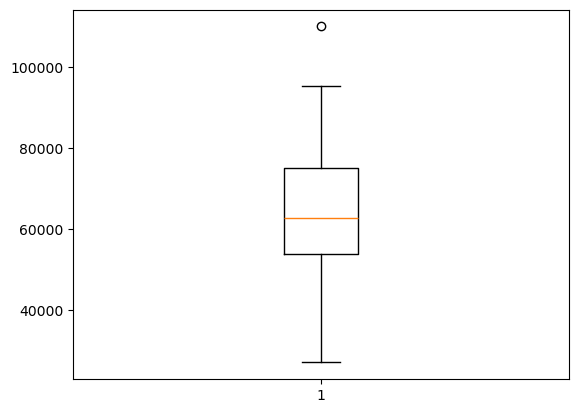

In [40]:
plt.boxplot(df["Annual_Salary($)"]);

### Central Limit Theorem

#### 1. Distribution of samples of different sizes

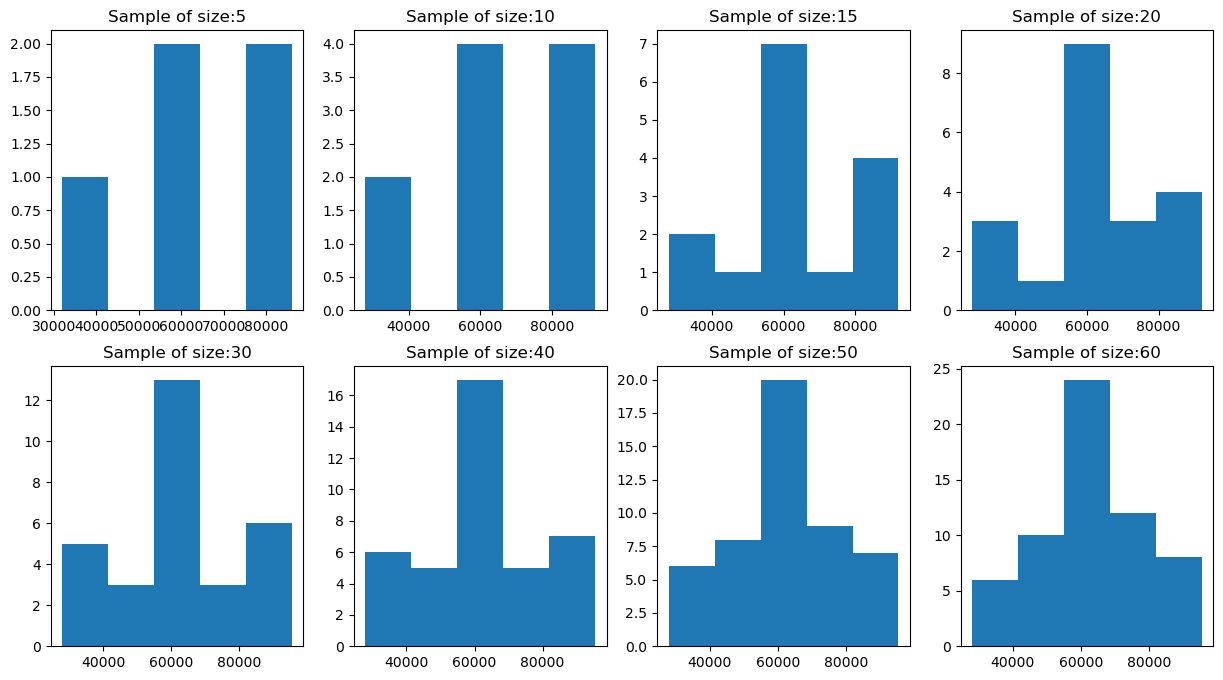

In [41]:
fig,ax=plt.subplots(2,4,figsize=(15,8))
num=[5,10,15,20,30,40,50,60]
sample_df=pd.DataFrame()
data_s=[]
for i  in num:
    sample_df=df.sample(n=i,random_state=1)
    data_s.append(sample_df['Annual_Salary($)'].tolist())

data_s
k=0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(data_s[k],bins=5)
        ax[i,j].set_title("Sample of size:"+str(len(data_s[k])))
        k=k+1

plt.show()

##### Interpretation from Plots

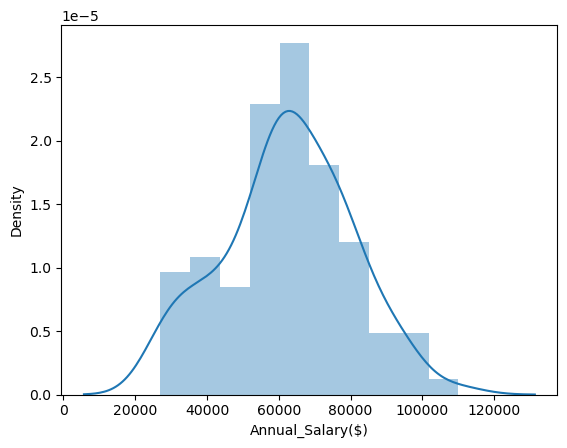

In [42]:
sb.distplot(df['Annual_Salary($)']);

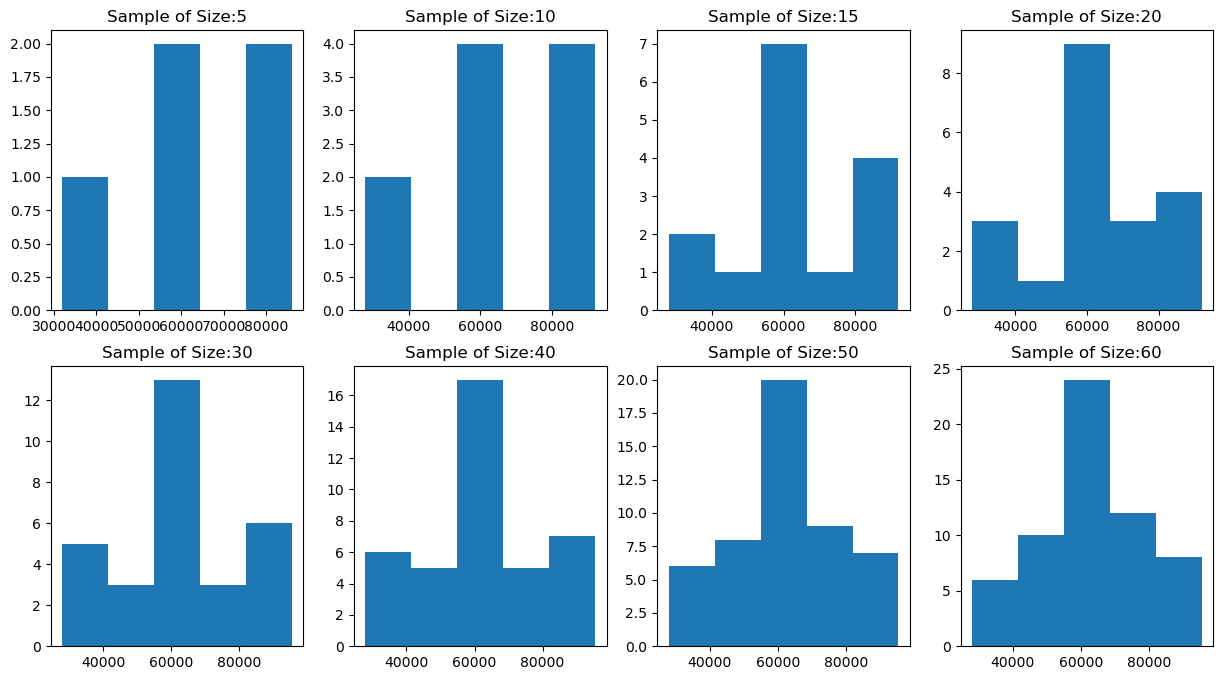

In [43]:
fig,ax=plt.subplots(2,4,figsize=(15,8))
num=[5,10,15,20,30,40,50,60]
sample_df=pd.DataFrame()
data_s=[]

for i in num:
    sample_df=df.sample(n=i,random_state=1)
    data_s.append(sample_df["Annual_Salary($)"].tolist())
data_s
k=0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(data_s[k],bins=5)
        #sb.distplot(data_s[k], ax=ax[i,j])
        ax[i,j].set_title("Sample of Size:"+str(len(data_s[k])))
        k = k+1

plt.show()

####  Extract sample data using random sampling with relacement technique. (Make sure that the sample size must be greater than 30)

In [44]:
sample_1=df.sample(n=50,replace=True,random_state=1)

#### 2. Calculation of Population Parameter (Mean, Median, Standard Deviation)

In [45]:
p_mean = df['Annual_Salary($)'].mean()
p_median = df['Annual_Salary($)'].median()
p_std = df['Annual_Salary($)'].std()
p_skew = sts.skew(df['Annual_Salary($)'], bias = False)
p_kurt = sts.kurtosis(df['Annual_Salary($)'], bias = False)

print("Population mean is", p_mean)
print("Population median is", p_median)
print("Population standard deviation is", p_std)
print("Population skew is", p_skew)
print("Population kurtosis is", p_kurt)

Population mean is 62392.6
Population median is 62600.0
Population standard deviation is 17836.06892753775
Population skew is -0.059690326690678586
Population kurtosis is -0.2631784946504583


#### 3. Calculation of Sample Statistics (Mean, Median, Standard Deviation)

In [46]:
s_mean = sample_1['Annual_Salary($)'].mean()
s_median = sample_1['Annual_Salary($)'].median()
s_std = sample_1['Annual_Salary($)'].std()
s_skew = sts.skew(sample_1['Annual_Salary($)'], bias = False)
s_kurt = sts.kurtosis(sample_1['Annual_Salary($)'], bias = False)

print("Sample mean is", s_mean)
print("Sample median is", s_median)
print("Sample standard deviation is", s_std)
print("Sample skew is", s_skew)
print("Sample kurtosis is", s_kurt)

Sample mean is 62363.4
Sample median is 63250.0
Sample standard deviation is 19456.01807216702
Sample skew is 0.047771904935189985
Sample kurtosis is -0.43151226758697003


##### Interpretation from above data

#### 4. Sample Standard Deviation calculated using Population Standard Deviation

In [47]:
sample_2 = df.sample(n=60,replace=True, random_state=1)

In [48]:
s2_mean = sample_2['Annual_Salary($)'].mean()
s2_median = sample_2['Annual_Salary($)'].median()
s2_std = sample_2['Annual_Salary($)'].std()
s2_skew = sts.skew(sample_2['Annual_Salary($)'], bias = False)
s2_kurt = sts.kurtosis(sample_2['Annual_Salary($)'], bias = False)

print("Sample 2 mean is", s2_mean)
print("Sample 2 median is", s2_median)
print("Sample 2 standard deviation is", s2_std)
print("Sample 2 skew is", s2_skew)
print("Sample 2 kurtosis is", s2_kurt)

Sample 2 mean is 62802.833333333336
Sample 2 median is 63250.0
Sample 2 standard deviation is 18162.974919815668
Sample 2 skew is 0.006033072173781208
Sample 2 kurtosis is -0.14350030968268523


##### Final Interpretation

## Central Limit Theorem:

### - n>=30
### - sampling distribution will tend to normal distribution
### - Sample mean ~ Population mean
### - As size of sample is increasing sample standard deviation will decrease

#### Probability Distribution curve of population and sample

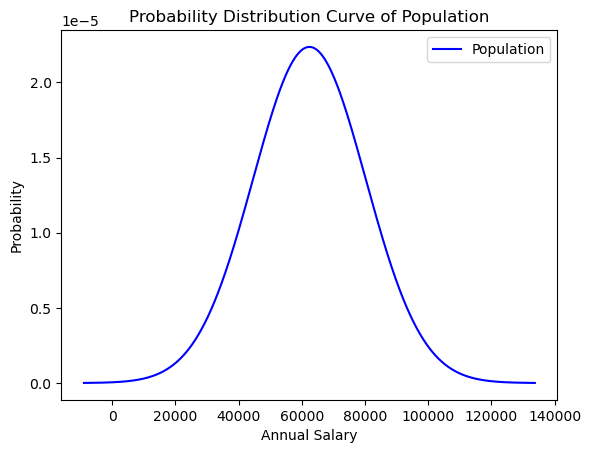

In [49]:
from scipy.stats import norm

lower_p = p_mean - 4*p_std
upper_p = p_mean + 4*p_std

norm_p = np.arange(lower_p, upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_std), label = "Population", color = "blue")
plt.legend()
plt.xlabel("Annual Salary")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Population")
plt.show()

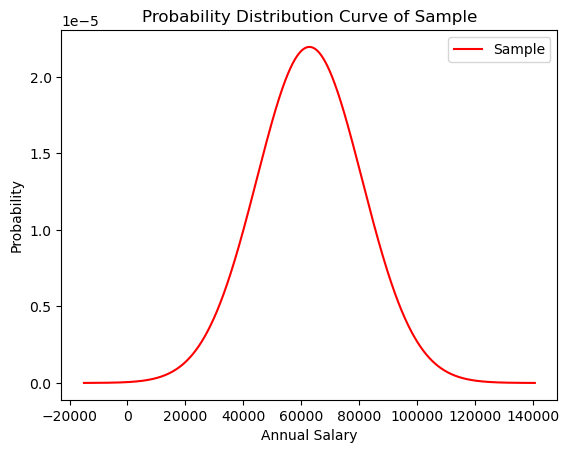

In [50]:
lower_s = s2_mean - 4*s_std
upper_s = s2_mean + 4*s_std

norm_s = np.arange(lower_s, upper_s)
plt.plot(norm_s, norm.pdf(norm_s, s2_mean, s2_std), label = "Sample", color = "red")
plt.legend()
plt.xlabel("Annual Salary")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Sample")
plt.show()

## Demo - 5.3: Standard Normal Distribution

### Read data from source file

### Calculate z-scores

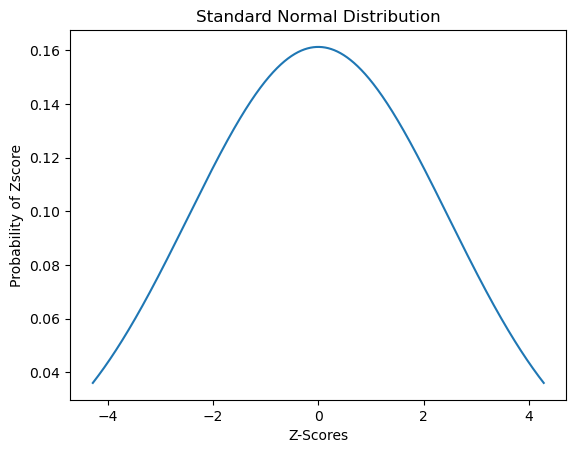

In [51]:
import statistics as st

standard_data = []
for i in norm_s:
  zs = (i - s2_mean)/s2_std
  standard_data.append(zs)

sb.lineplot(x=standard_data, y=sts.norm.pdf(standard_data, st.mean(standard_data), st.stdev(standard_data)))
plt.xlabel("Z-Scores")
plt.ylabel("Probability of Zscore")
plt.title("Standard Normal Distribution")
plt.show()

### Calculate probability values of the z-score

In [52]:
x = 85000
z_score_85000 = (x-p_mean)/p_std
prob = 1 - sts.norm.cdf(z_score_85000)
print("Probability of 85000 is", prob)

Probability of 85000 is 0.10248645231055531


### Draw Normal Probability Distribution

### Interpretation